<a href="https://colab.research.google.com/github/CristianMihalceanu/EDA_Deep_Learning/blob/main/Deep_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Will the loan be repaid - Deep learning project

## Scope of the projects

The purpose of the project is to help banks decide who they should grant a loan to, by predicting whether the money will be paid back or not. By using artificial neural networks, we take into consideration the features of the person requesting a loan and find the correlations with the predicting variable.

## Overview of the project

1. Gathering the data and importing useful libraries
2. Exploratory data analysis through heatmaps, distplots and countplots to determine how many times each specific type of loan was requeste 
3. Preprocessing, where we impute missing values or drop the rows that contain too little information'
4. We scale our data, perform the train/ test split, and build and train or ANN model
5. We generate predictions, evaluate the performance of our model and test our model on a new observation


## Gathering the Data

Data was collected from a dataset provided on Kaggle: https://www.kaggle.com/wordsforthewise/lending-club/notebooks

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving lending_club_info.csv to lending_club_info (1).csv
Saving lending_club_loan_two.csv to lending_club_loan_two (1).csv


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['lending_club_loan_two.csv']))
import io
df_info = pd.read_csv(io.BytesIO(uploaded['lending_club_info.csv']))

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## EDA

Let's analyze if we have the same amount of observations for loans that have been paid off as one that haven't:

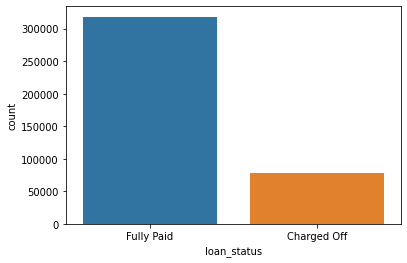

In [ ]:
sns.countplot(x='loan_status',data=df)

Analyzing the countplot above, we see that we have to deal with an imbalanced dataset, meaning we can expect to predict really well loans that will be paid off, but struggle to point out some that eventually won't. 

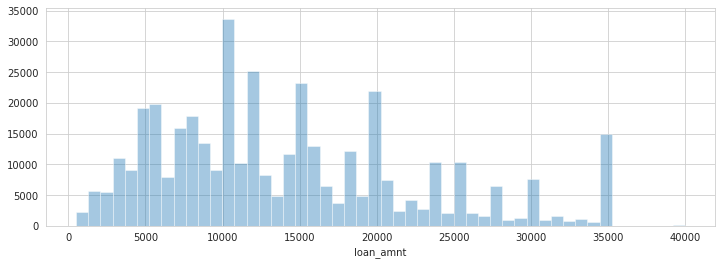

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False)

The distplot above shows a somewhat expected tendency: at an even amount of money: 10k, 20k, we have spikes in the number on loans, meaning that banks provide standard loans with those specific amounts

Let's explore how many individuals requested loans of value over 40k:

In [ ]:
df[df['loan_amnt']>=40000]['loan_amnt'].value_counts

<bound method IndexOpsMixin.value_counts of 3998      40000.0
4788      40000.0
7456      40000.0
8391      40000.0
11525     40000.0
           ...   
384312    40000.0
387907    40000.0
388146    40000.0
388675    40000.0
393914    40000.0
Name: loan_amnt, Length: 180, dtype: float64>

In [ ]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


Up next, let's look at the relations that occur between the features, with a heatmap:

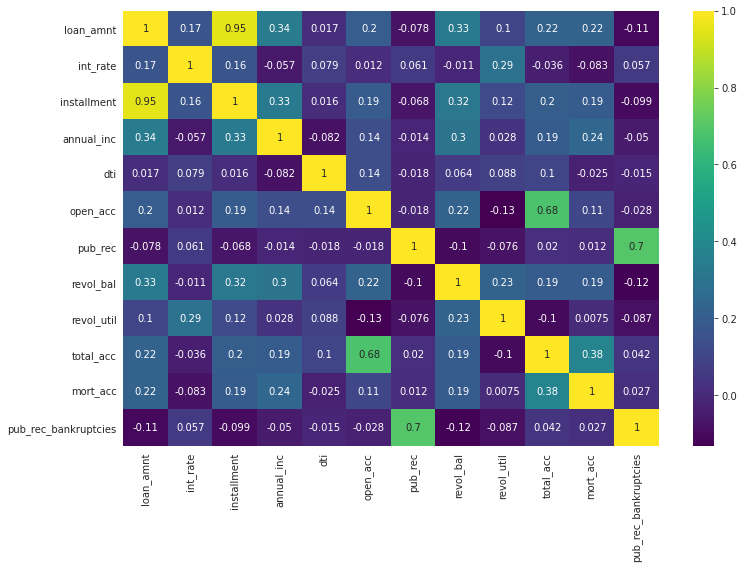

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

There is a clear dependency between the loan_amount and the installment, which makes sense considering that the installment is probably calculated based off a formula that involves the amount of money that was requested.

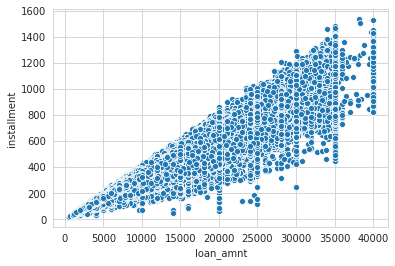

In [ ]:
sns.scatterplot(x='loan_amnt',y='installment',data=df)

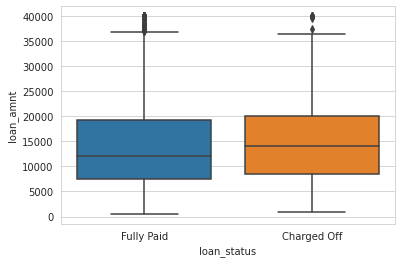

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

The boxplot above shows that if the loan amount is higher, we have a slight increase in the chance of the loan not being paid off 

In [ ]:
df.groupby('loan_status').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,
Charged Off,15126.300967,15.882587,452.703110,67535.537710,19.656346,11.602513,0.199606,15390.454701,57.869824,24.984152,1.501213,0.128412
Fully Paid,13866.878771,13.092105,426.761866,75829.951566,16.824010,11.240067,0.172966,15955.327918,52.796918,25.519800,1.892836,0.119997


In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

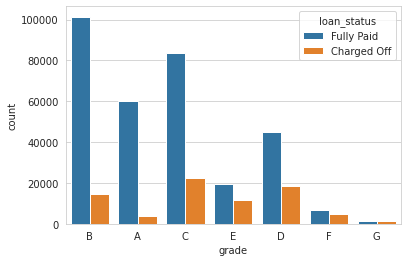

In [ ]:
sns.countplot(x='grade',data=df,hue='loan_status')

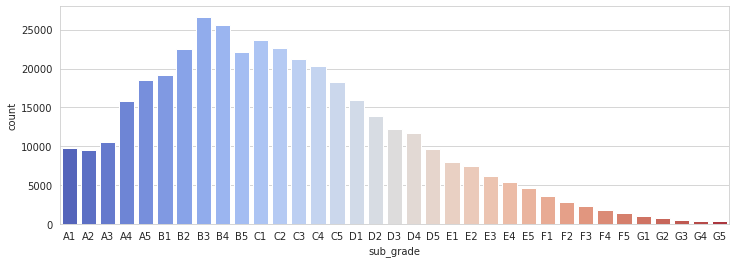

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

Through the illustrated countplot we saw how many loans have been requeste of each category

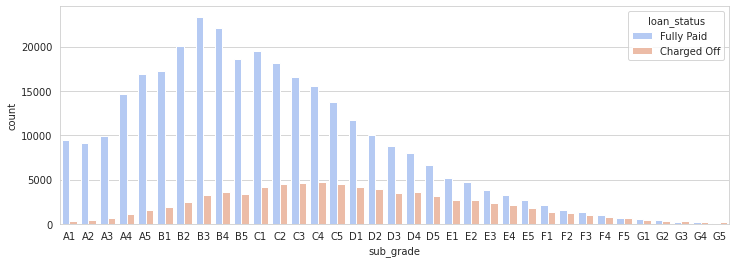

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm',
              hue='loan_status')

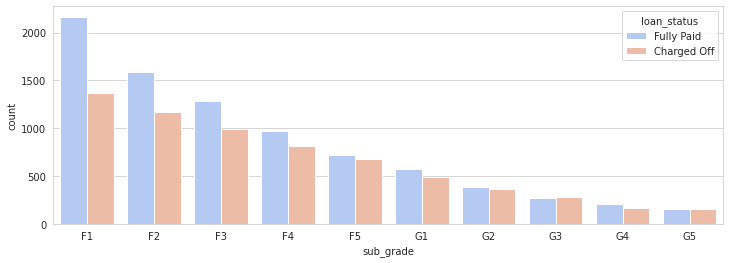

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df[(df['grade']=='F') | (df['grade']=='G') ]['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df[(df['grade']=='F') | (df['grade']=='G') ],order = subgrade_order,palette='coolwarm',
              hue='loan_status')

In [ ]:
def explicit(x):
  if x=='Fully Paid':
    return 1
  else:
    return 0

df['loan_repaid']=df['loan_status'].apply(explicit)

We created another column, to have the dependant variable as a column on integers, to explore the correlations between it and the other columns consisting of integers or floating points

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


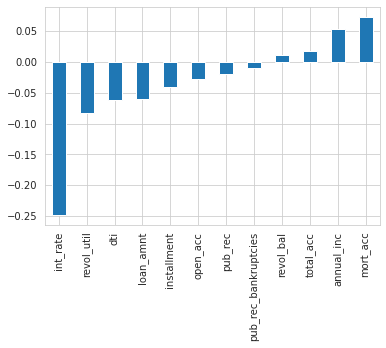

In [ ]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

The above values mainly tend to oscilate around 0, but the "interest rate" is shown to have a nagative correlation on a load being paid back, meaning the higher the interest rate, the more dicreased the chance of the loan being paid back

## Data Preprocessing

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [ ]:
len(df)

396030

After we refreshed our memory on the number of observations in our dataframe, let's explore if there are any columns with missing values

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let's calculate the procent that the missing values represent

In [ ]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Exploring the "emp_title" column further, we aknowledge there are too many different classes in this column, for it to provide any valuable information, so we'll drop it

In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

Teacher                       4389
Manager                       4250
Registered Nurse              1856
RN                            1846
Supervisor                    1830
                              ... 
Cumberland Valley Electric       1
Health Practice Director         1
M&F Western Products             1
Code Compliance Officer          1
Performance Anaylst              1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df.drop('emp_title',axis=1,inplace=True)

Let's explore the chance of a loan being paid back along with the passing of time:

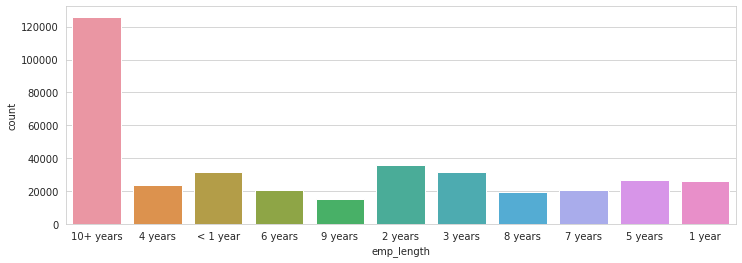

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df)

In [ ]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

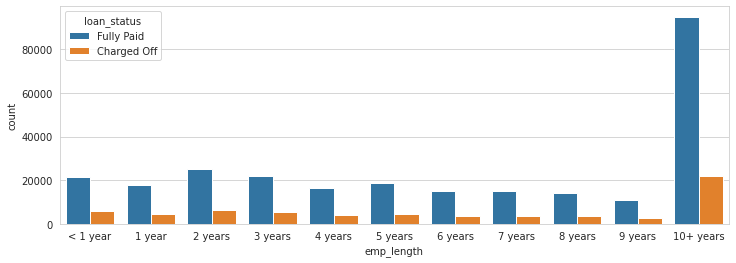

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df.dropna(),order=emp_length_order,hue='loan_status')

Charge off rates are extremely similar across all employment lengths. So again, we found another column we can drop as it doesn't provide us any useful information

In [ ]:
df.drop('emp_length',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


The title column is simply a string subcategory/description of the purpose column

In [ ]:
df.drop('title',axis=1,inplace=True)

In [ ]:
df['mort_acc'].value_counts()   #Number of mortgage accounts.

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Instead of using a SimpleImputer, let's try to fill the missing values ourselves, with the mean along the column

In [ ]:
df['mort_acc']=df.fillna(df['mort_acc'].mean())

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
df.drop(['revol_util','pub_rec_bankruptcies'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

Now that we no longer have missing values in our dataset, let's OneHot Encode Categorical columns so that we can later apply our Deep Learning model

In [ ]:
df.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
open_acc               float64
pub_rec                float64
revol_bal              float64
total_acc              float64
initial_list_status     object
application_type        object
mort_acc               float64
address                 object
loan_repaid              int64
dtype: object

In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [ ]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df.drop('grade',axis=1,inplace=True)

In [ ]:
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
df=pd.concat([df,subgrade_dummies],axis=1)

In [ ]:
df.head(1)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,initial_list_status,purpose,verification_status,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0


In [ ]:
df2=pd.get_dummies( ['verification_status', 'application_type','initial_list_status','purpose'],drop_first=True)

In [ ]:
df=pd.concat([df,df2],axis=1)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

In [ ]:
df['zip_code']=df['address'].apply(lambda x: x[-5:])

In [ ]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [ ]:
df.drop(['home_ownership','verification_status','issue_d','application_type','initial_list_status','purpose'],axis=1,inplace=True)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,mort_acc,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,25.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,27.0,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,26.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,13.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,43.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


Now let's generate some features based of the 'earliest_cr_line' column, which we can approach as a datetime object

In [ ]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [ ]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: x.year)

In [ ]:
df.drop('loan_status',axis=1,inplace=True)

## Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [ ]:
df = df.sample(frac=0.1,random_state=101)

For a shorter runtime, although a smaller precision considering we are not using all available data, we'll train our model on only a tenth of the observations

In [ ]:
len(df)

39603

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Next we need to scale the data for the backpropagation algorithm to work at its optimal

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_train.shape

(316824, 58)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model=Sequential()

model.add(Dense(58,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(29,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

The dropout layers refer to the percent of the neurons that shall randomly be shut down during the learning process, so that we allow the observations to have similar importance in the learning stage

We'll use early stopping condition to further improve our runtime, stopping the training phase after the leaning curve has plateued, and the algorithm ins't improving on its loss function

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=25,
          callbacks=[early_stop]
          )

Epoch 1/25
9901/9901 [==============================] - 14s 1ms/step - loss: 0.2648 - val_loss: 0.2606
Epoch 2/25
9901/9901 [==============================] - 14s 1ms/step - loss: 0.2647 - val_loss: 0.2609
Epoch 3/25
9901/9901 [==============================] - 14s 1ms/step - loss: 0.2645 - val_loss: 0.2606
Epoch 4/25
9901/9901 [==============================] - 14s 1ms/step - loss: 0.2642 - val_loss: 0.2604
Epoch 5/25
9901/9901 [==============================] - 14s 1ms/step - loss: 0.2642 - val_loss: 0.2608
Epoch 6/25
9901/9901 [==============================] - 13s 1ms/step - loss: 0.2639 - val_loss: 0.2600
Epoch 7/25
9901/9901 [==============================] - 14s 1ms/step - loss: 0.2641 - val_loss: 0.2611
Epoch 8/25
9901/9901 [==============================] - 13s 1ms/step - loss: 0.2642 - val_loss: 0.2610
Epoch 9/25
9901/9901 [==============================] - 14s 1ms/step - loss: 0.2638 - val_loss: 0.2600
Epoch 10/25
9901/9901 [==============================] - 14s 1ms/step - l

In [ ]:
losses=pd.DataFrame(model.history.history)

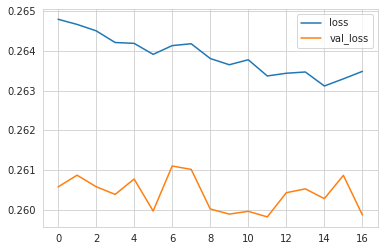

In [ ]:
losses.plot()

After plotting the loss function, we aknowledge that we rightly stopped the algorithm after the plateu was reached and further learning would have negatively impacted our model

## Evaluating performance

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
predictions=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 6703  8790]
 [    0 63713]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('full_data_project_model.h5')  

In [ ]:
#Given the customer below, would you offer this person a loan?

## Real-life example

Let's use or model in real life scenrio. Given a random observation, let's analyze whether the individual would pay back he loan, so that the bank can grant it to him in the first place

In [ ]:
import random

random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            18000.000000
term                    36.000000
int_rate                 9.330000
installment            575.170000
annual_inc          102000.000000
dti                     16.950000
open_acc                30.000000
pub_rec                  0.000000
revol_bal            10463.000000
total_acc               63.000000
mort_acc                 3.242038
A2                       0.000000
A3                       0.000000
A4                       0.000000
A5                       0.000000
B1                       0.000000
B2                       0.000000
B3                       1.000000
B4                       0.000000
B5                       0.000000
C1                       0.000000
C2                       0.000000
C3                       0.000000
C4                       0.000000
C5                       0.000000
D1                       0.000000
D2                       0.000000
D3                       0.000000
D4                       0.000000
D5            

In [ ]:
model.predict_classes(new_customer.values.reshape(1,58))

array([[1]], dtype=int32)

So the algorithm predicted that the person would pay it back

In [ ]:
df['loan_repaid'].iloc[random_ind]

1

And it turns out the person really would paid it back